## Meat consumption trends through the years 
# This project will seek to find trends in the consumption of meat in many countries around the world.
The data been taken from 1961 to 2018 and for many different trends in the way people consume meat. I found many seperate csv files of data surrounding the consumption of meat and I intend to merge them together to be able to correlate the values with each other.
🥅 My Goals:
- To learn to merge together and clean up data from multiple sources to create insightful conclusions about the data
- Create a story through the processing of the data 
- Make some visually appealing graphs using pandas and numpy 

In [237]:
# This will be where add any imports that I may need for my analysis
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
import os
import seaborn as sns
import csv
from functools import reduce
import csv



I will now read in all the data and begin to look at how I will clean and combine the various datasets

In [238]:
df_gdp = pd.read_csv("meat-consumption-vs-gdp-per-capita.csv", index_col=[0])
df_prod = pd.read_csv("meat-production-tonnes.csv")
df_supply= pd.read_csv("meat-supply-per-person.csv")
df_egg = pd.read_csv("per-capita-egg-consumption-kilograms-per-year.csv")
df_milk = pd.read_csv("per-capita-milk-consumption.csv")



## Cleaning
Now that the file has been read, I worked to clean the data up and first add in continent names to the data so that I can later group the countries by continent when I want to. Also cleared out all values that were messy or data points that were not relevant or actual countries. 

In [239]:
# Create lists of all countries and territories in each of the continents
asia_countries = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh","Bhutan",
"Brunei",'Cambodia','China','Christmas Island','Cocos Islands' ,'Cyprus','Georgia','Hong Kong',
'India','Indonesia'	,'Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea' ,'South Korea',
'Kuwait','Kyrgyzstan','Laos','Lebanon','Macau','Malaysia','Maldives','Mongolia','Burma','Nepal','Oman',
'Pakistan','Palestine','Philippines','Qatar','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan',
'Thailand','East Timor','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']
africa_countries = ['Algeria', 'Angola', 'Benin','Botswana', 'Burkina Faso','Burundi',
'Cameroon','Cape Verde','Central African Republic',
'Chad','Comoros','Congo','Democratic Republic of Congo',"Cote d'Ivoire",'Djibouti',
'Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',' Guinea-Bissau',
'Kenya','Lesotho','Liberia','Libya','Madagascar',' Malawi','Mali','Mauritania','Mauritius','Mayotte',
'Morocco','Mozambique','Namibia','Niger',' Nigeria','Réunion','Rwanda','Saint Helena','São Tomé and Príncipe',
'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan','Swaziland','Tanzania' ,'Togo',
'Tunisia','Uganda','Zambia','Zimbabwe','Western Sahara','Eswatini']
na_countries = ['Canada' ,'Mexico','United States','Anguilla','Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Dominica',
'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Nicaragua','Panama','Cuba',
'Sait Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','Bermuda','British Virgin Islands','Cayman Islands'] 
australia_countries = ['Australia','Micronesia','Fiji','Kiribati','Marshall Islands','Nauru',
'New Zealand','Palau','Papua New Guinea', 'Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu', 'American Samoa','Cook Islands','Wallis and Futuna']
europe_countries = ['Albania' ,'Andorra' ,'Armenia' , 'Austria' ,'Azerbaijan' ,'Belarus' ,'Belgium' ,'Bosnia and Herzegovina' ,
'Bulgaria' ,'Croatia' ,'Cyprus' ,'Czechia' ,'Denmark' ,'Estonia' ,'Finland' ,'France' ,'Georgia' ,'Germany' ,
'Greece' ,'Hungary' ,'Iceland' ,'Ireland' ,'Italy' ,'Kazakhstan' ,'Kosovo','Latvia','Liechtenstein',
'Lithuania','Luxembourg' ,'Malta' ,'Moldova' ,'Monaco' ,'Montenegro' ,'Netherlands' ,'North Macedonia' ,
'Norway' ,'Poland' ,'Portugal' ,'Romania' ,'Russia' ,'San Marino' ,'Serbia' ,'Slovakia' ,'Slovenia' ,
'Spain' ,'Sweden' ,'Switzerland' ,'Turkey' ,'Ukraine' ,'United Kingdom' ,'Vatican City','Bouvet Island','Åland Islands']
sa_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 
'Suriname', 'Uruguay', 'Venezuela','Falkland Islands', 'South Georgia', 'South Sandwich Islands', 'French Guiana', 'Aruba',
'Bonaire Sint Eustatius and Saba','Curacao']

I was unable to find a way to organize the countries into continents in an easier way, so I was forced to create a list of all countries/territories that belong to each continent

## Using Mask
Below I used the Mask function to assign each data point to its respective continent by referring to the lists above. Head() allows me to see the first 5 values, where the continent is now Asia.

In [240]:
df_gdp['Continent'].mask(df_gdp['Entity'].isin(asia_countries), "Asia", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(europe_countries), "Europe", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(australia_countries), "Australia", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(na_countries), "North America", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(africa_countries), "Africa", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity'].isin(sa_countries), "South America", inplace=True)
df_gdp['Continent'].mask(df_gdp['Entity']=="Antarctica", "South America", inplace=True)
df_gdp.head()


,Entity,Code,Year,"Meat food supply quantity (kg/capita/yr) (FAO, 2020)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
1,Afghanistan,AFG,1961,14.45,NaN,9169406.0,Asia
2,Afghanistan,AFG,1962,14.46,NaN,9351442.0,Asia
3,Afghanistan,AFG,1963,14.88,NaN,9543200.0,Asia
4,Afghanistan,AFG,1964,15.07,NaN,9744772.0,Asia
5,Afghanistan,AFG,1965,15.38,NaN,9956318.0,Asia


## More dataframe customization
Below I drop all data points that are not correctly formatted or that do not correspond to the values I want to track. 

In [241]:
# I drop all the rows where there is no country code, as there were continents listed that had no real data
df_gdp.dropna(subset = ['Code'], inplace=True)
# Below I drop any rows were the code is > 3 because these aren't real data points
df_gdp.drop(df_gdp[df_gdp['Code'].map(len) > 3].index, inplace=True)
# Below I drop any remaining values that are not assigned a continent as they are not countries or relevant
df_gdp.dropna(subset=['Continent'], inplace=True)
# Below I drop all values with years before 1961 because they are predicted values and do not have corresponding gdp
df_gdp.drop(df_gdp[df_gdp['Year'] < 1961].index, inplace=True)
#df_gdp.drop(df_gdp.columns[0], axis=1, inplace=True)
df_gdp.to_csv('updated_gdp.csv', index=False)


## Merging all dataframes 
Below I learned to merge data frames:
- Merged based on certain contraints, in this case based on 'Entity','Code', and 'Year' as this is where all the data frames were the same.
- I used an outer merge so that no one dataframe had priority over the other and all values remained in the final.
- I also went about renaming the columns now that I could change all at the same time
- I saved this merged dataframe to a new df, so that I could see what it looks 

In [242]:
data_frames = [df_gdp, df_prod, df_egg, df_milk]
# Add all the dataframes together, merging my Entity, Code, and year, so that all the values line up correctly
df_merged_all = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Code','Year'],how='outer'), data_frames)
df_merged_all.rename(columns={'Entity':'Country', 'Population (historical estimates)': 'Population',
'Meat food supply quantity (kg/capita/yr) (FAO, 2020)':'Meat food supply quantity (kg/capita/yr)','GDP per capita, PPP (constant 2017 international $)':
'GDP per capita','Livestock Primary - Meat, Total - 1765 - Production - 5510 - tonnes':'Livestock Total Production (tonnes)',
'Meat food supply quantity (kg/capita/yr) (FAO, 2020)_y':'Meat food supply quantity (kg/capita/yr)',
'Eggs - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Eggs - Food supply quantity (kg/capita/yr)',
'Milk - Excluding Butter - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Milk - Excluding Butter - Food supply quantity (kg/capita/yr)'}, inplace=True)
df_merged_all.to_csv('merged_meat.csv', index=False)
df_merged_all.head()

,Country,Code,Year,Meat food supply quantity (kg/capita/yr),GDP per capita,Population,Continent,Livestock Total Production (tonnes),Eggs - Food supply quantity (kg/capita/yr),Milk - Excluding Butter - Food supply quantity (kg/capita/yr)
0,Afghanistan,AFG,1961,14.45,NaN,9169406.0,Asia,129420.0,0.94,59.30
1,Afghanistan,AFG,1962,14.46,NaN,9351442.0,Asia,132206.0,1.01,58.57
2,Afghanistan,AFG,1963,14.88,NaN,9543200.0,Asia,138971.0,1.04,63.87
3,Afghanistan,AFG,1964,15.07,NaN,9744772.0,Asia,143830.0,1.06,64.05
4,Afghanistan,AFG,1965,15.38,NaN,9956318.0,Asia,150195.0,1.10,68.62


## Initial Graphing
In the next section I will be graphing some preliminary data points to be able to get a sense of the data and ideas for how I will represent the various relationships between the values.

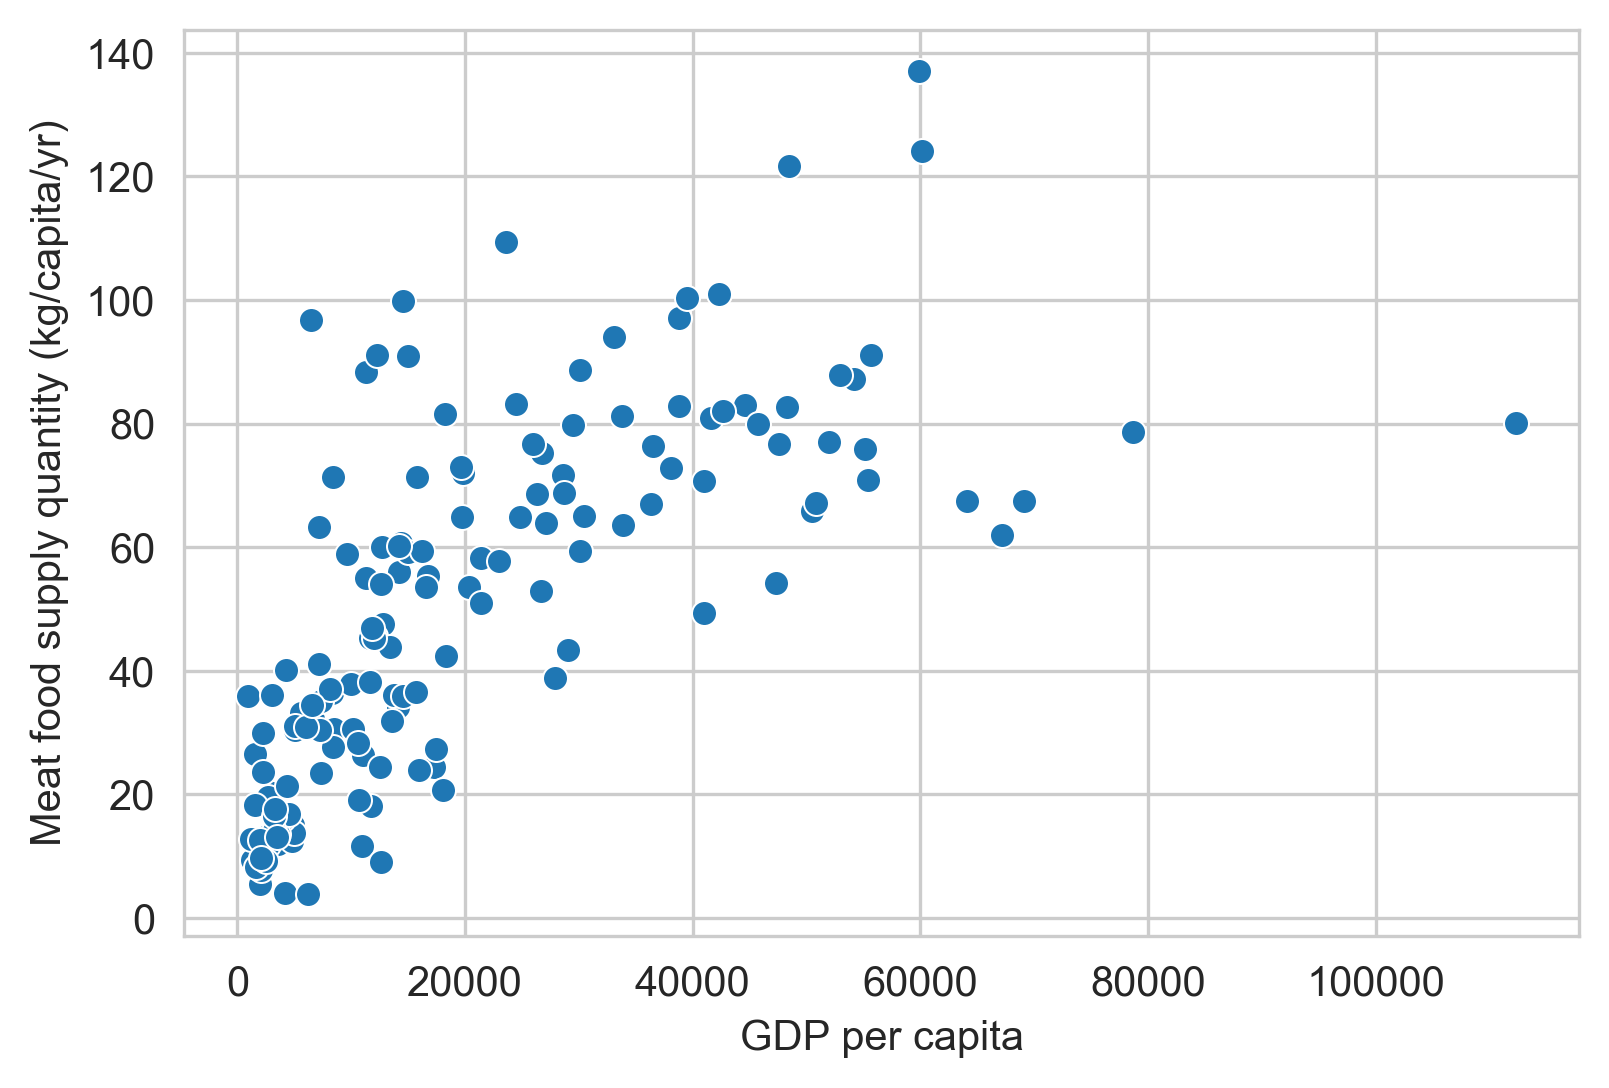

In [248]:
sns.scatterplot(x='GDP per capita',y='Meat food supply quantity (kg/capita/yr)', data= df_merged_all)
plt.show()

It is cool to see an initial trend in the data!
This however is graphing every single data point, including every single year for each country. While that might be something to explore the trends of in the future, I will first look to graph one single year, and it would make sense to graph the most recent, 2017. 

Now I will work to add labels to the axes.
I will also look to change the size of the circles, based on population of the country.
I will also filter out smaller countries.

In [249]:
# Selecting certain year for the dataframe
df_merged_all = df_merged_all.loc[df_merged_all['Year'] == 2017]

I have changed the dataframe such that only the year 2017 for all the countries will be plotted

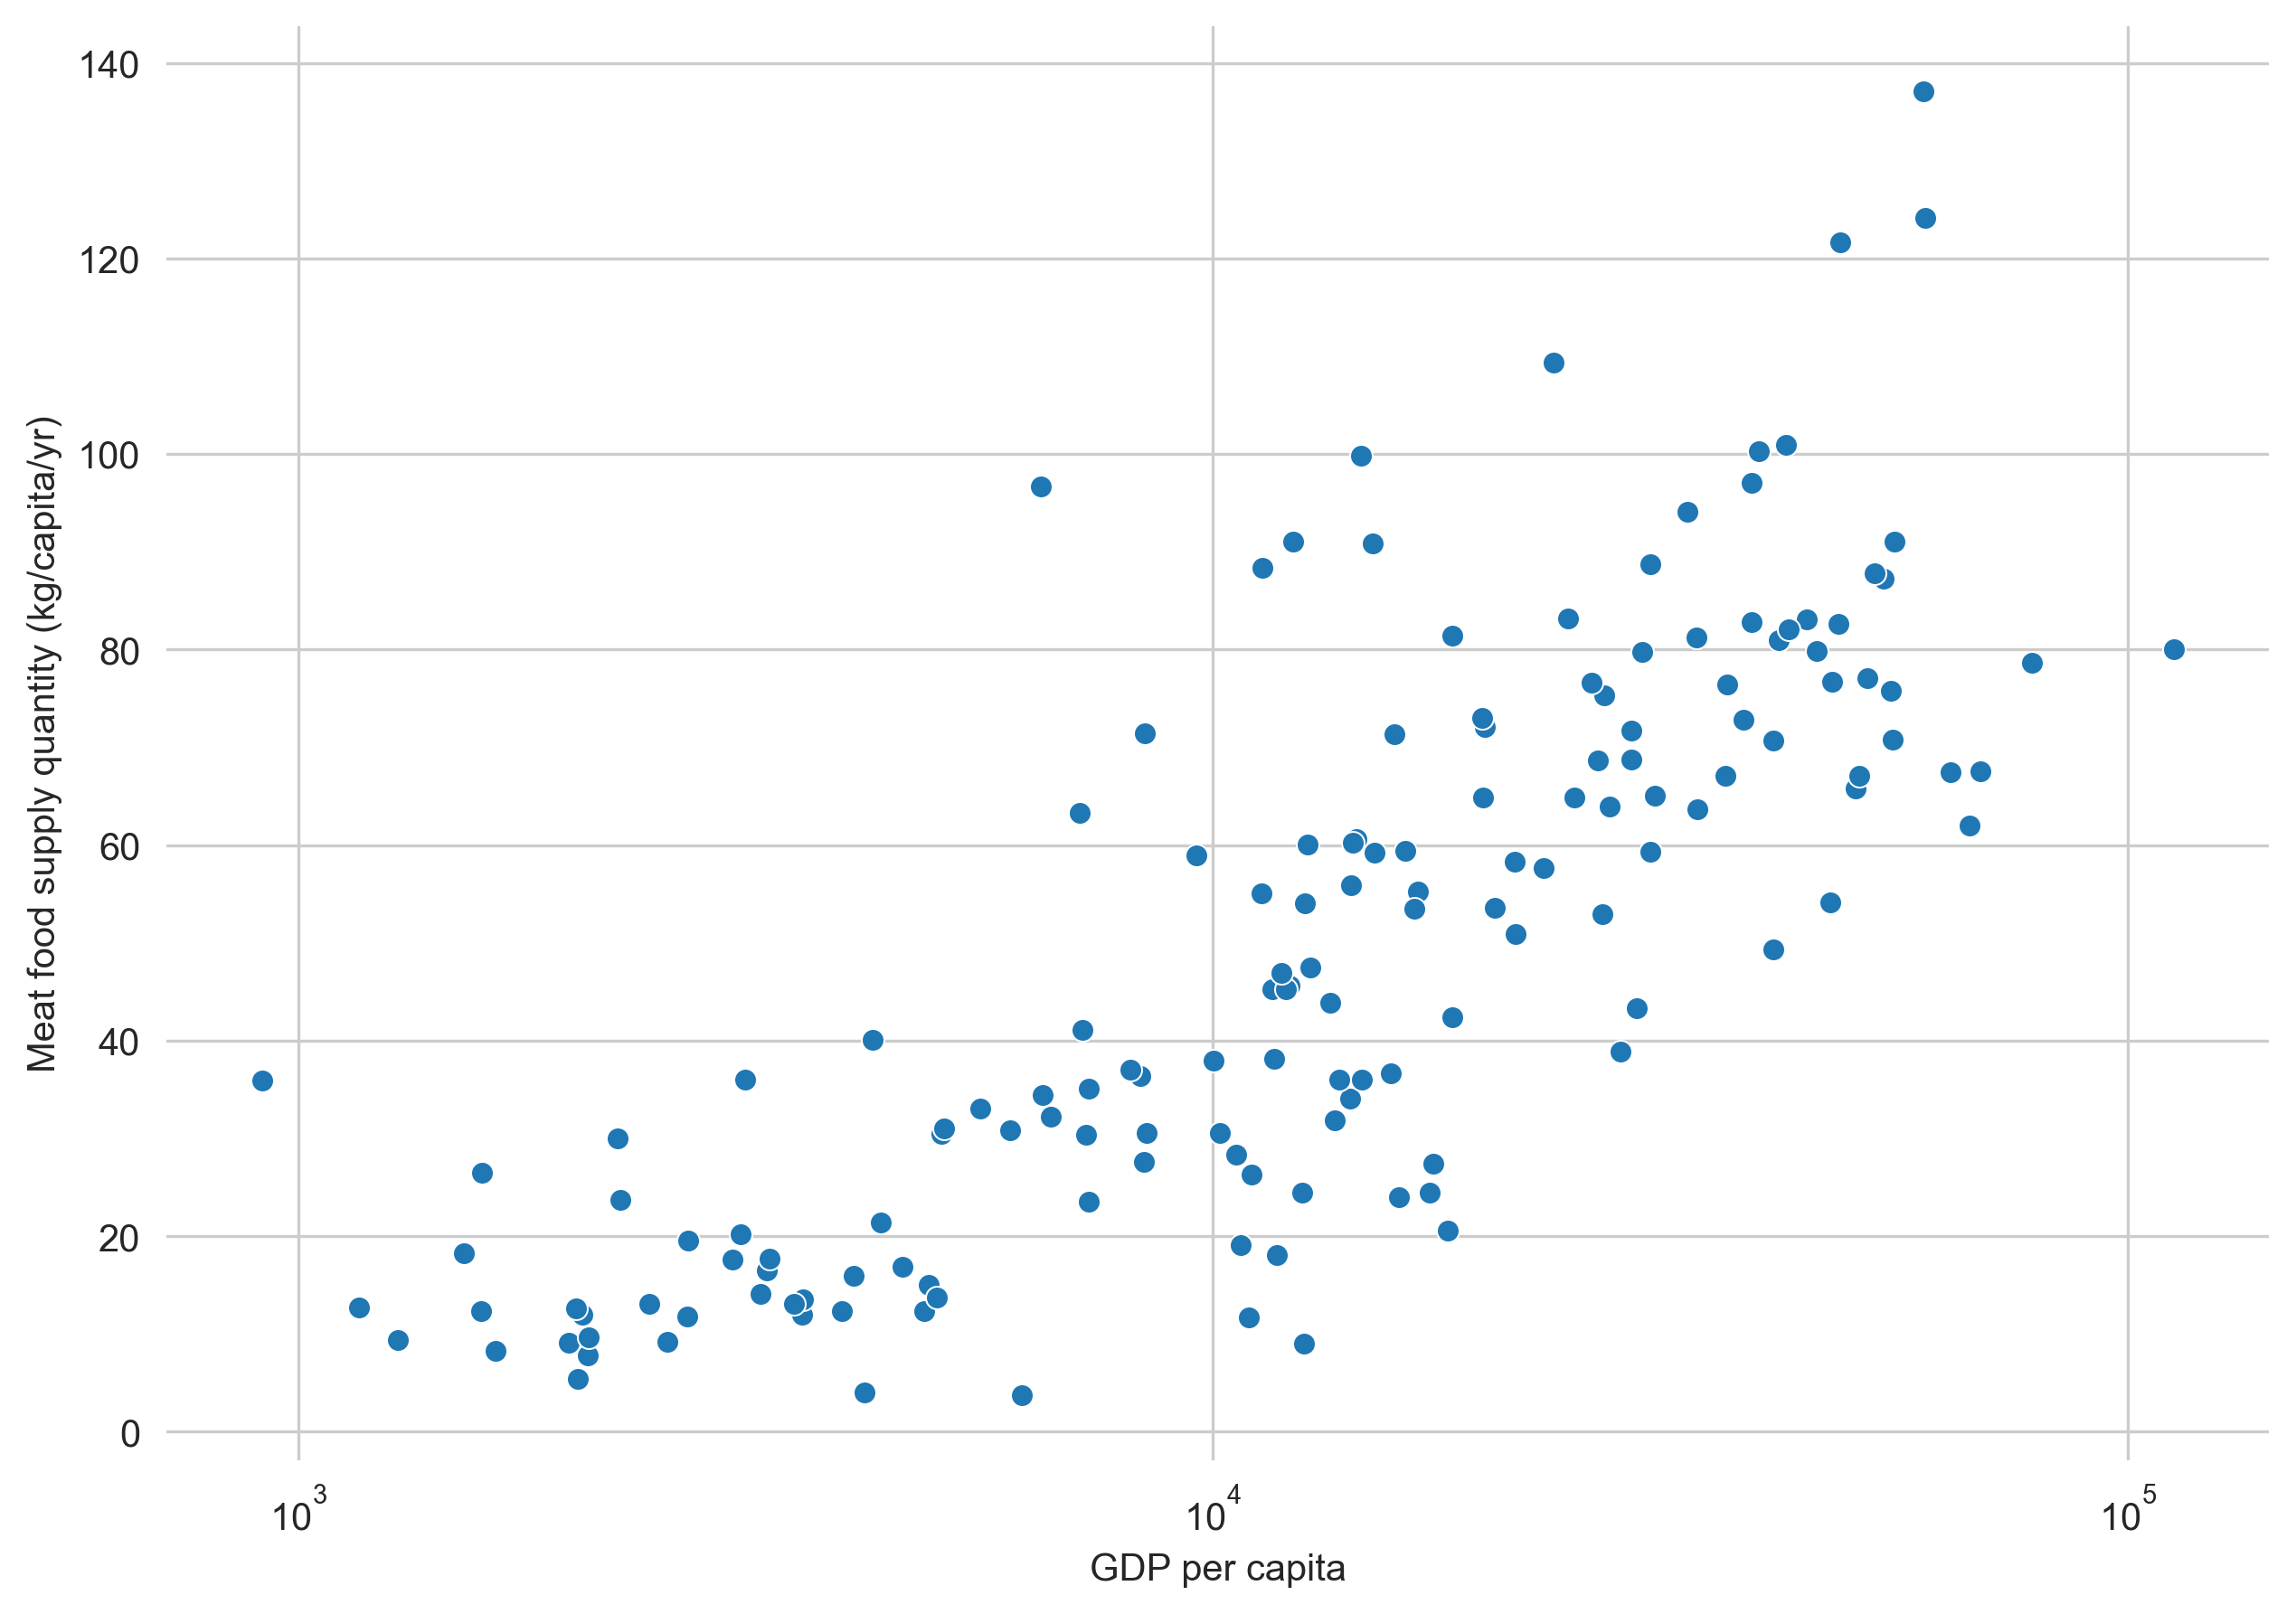

In [253]:
f, ax = plt.subplots(figsize=(10, 7))
sns.despine(f, left=True, bottom=True)
ax.set(xscale='log')
sns.scatterplot(x="GDP per capita", y="Meat food supply quantity (kg/capita/yr)", data = df_merged_all)
plt.show()          

This is the most general visualization of the data, where each point is on the graph and we can begin to see correlations between GDP and Meat Consumption. From here, I will customize the graph as such:
- Make each point correspond to a color and country name
- change size based on population of each country
- Draw a trend line between the two variables
- Changed scale to log so that data is spread out and makes more sense visually

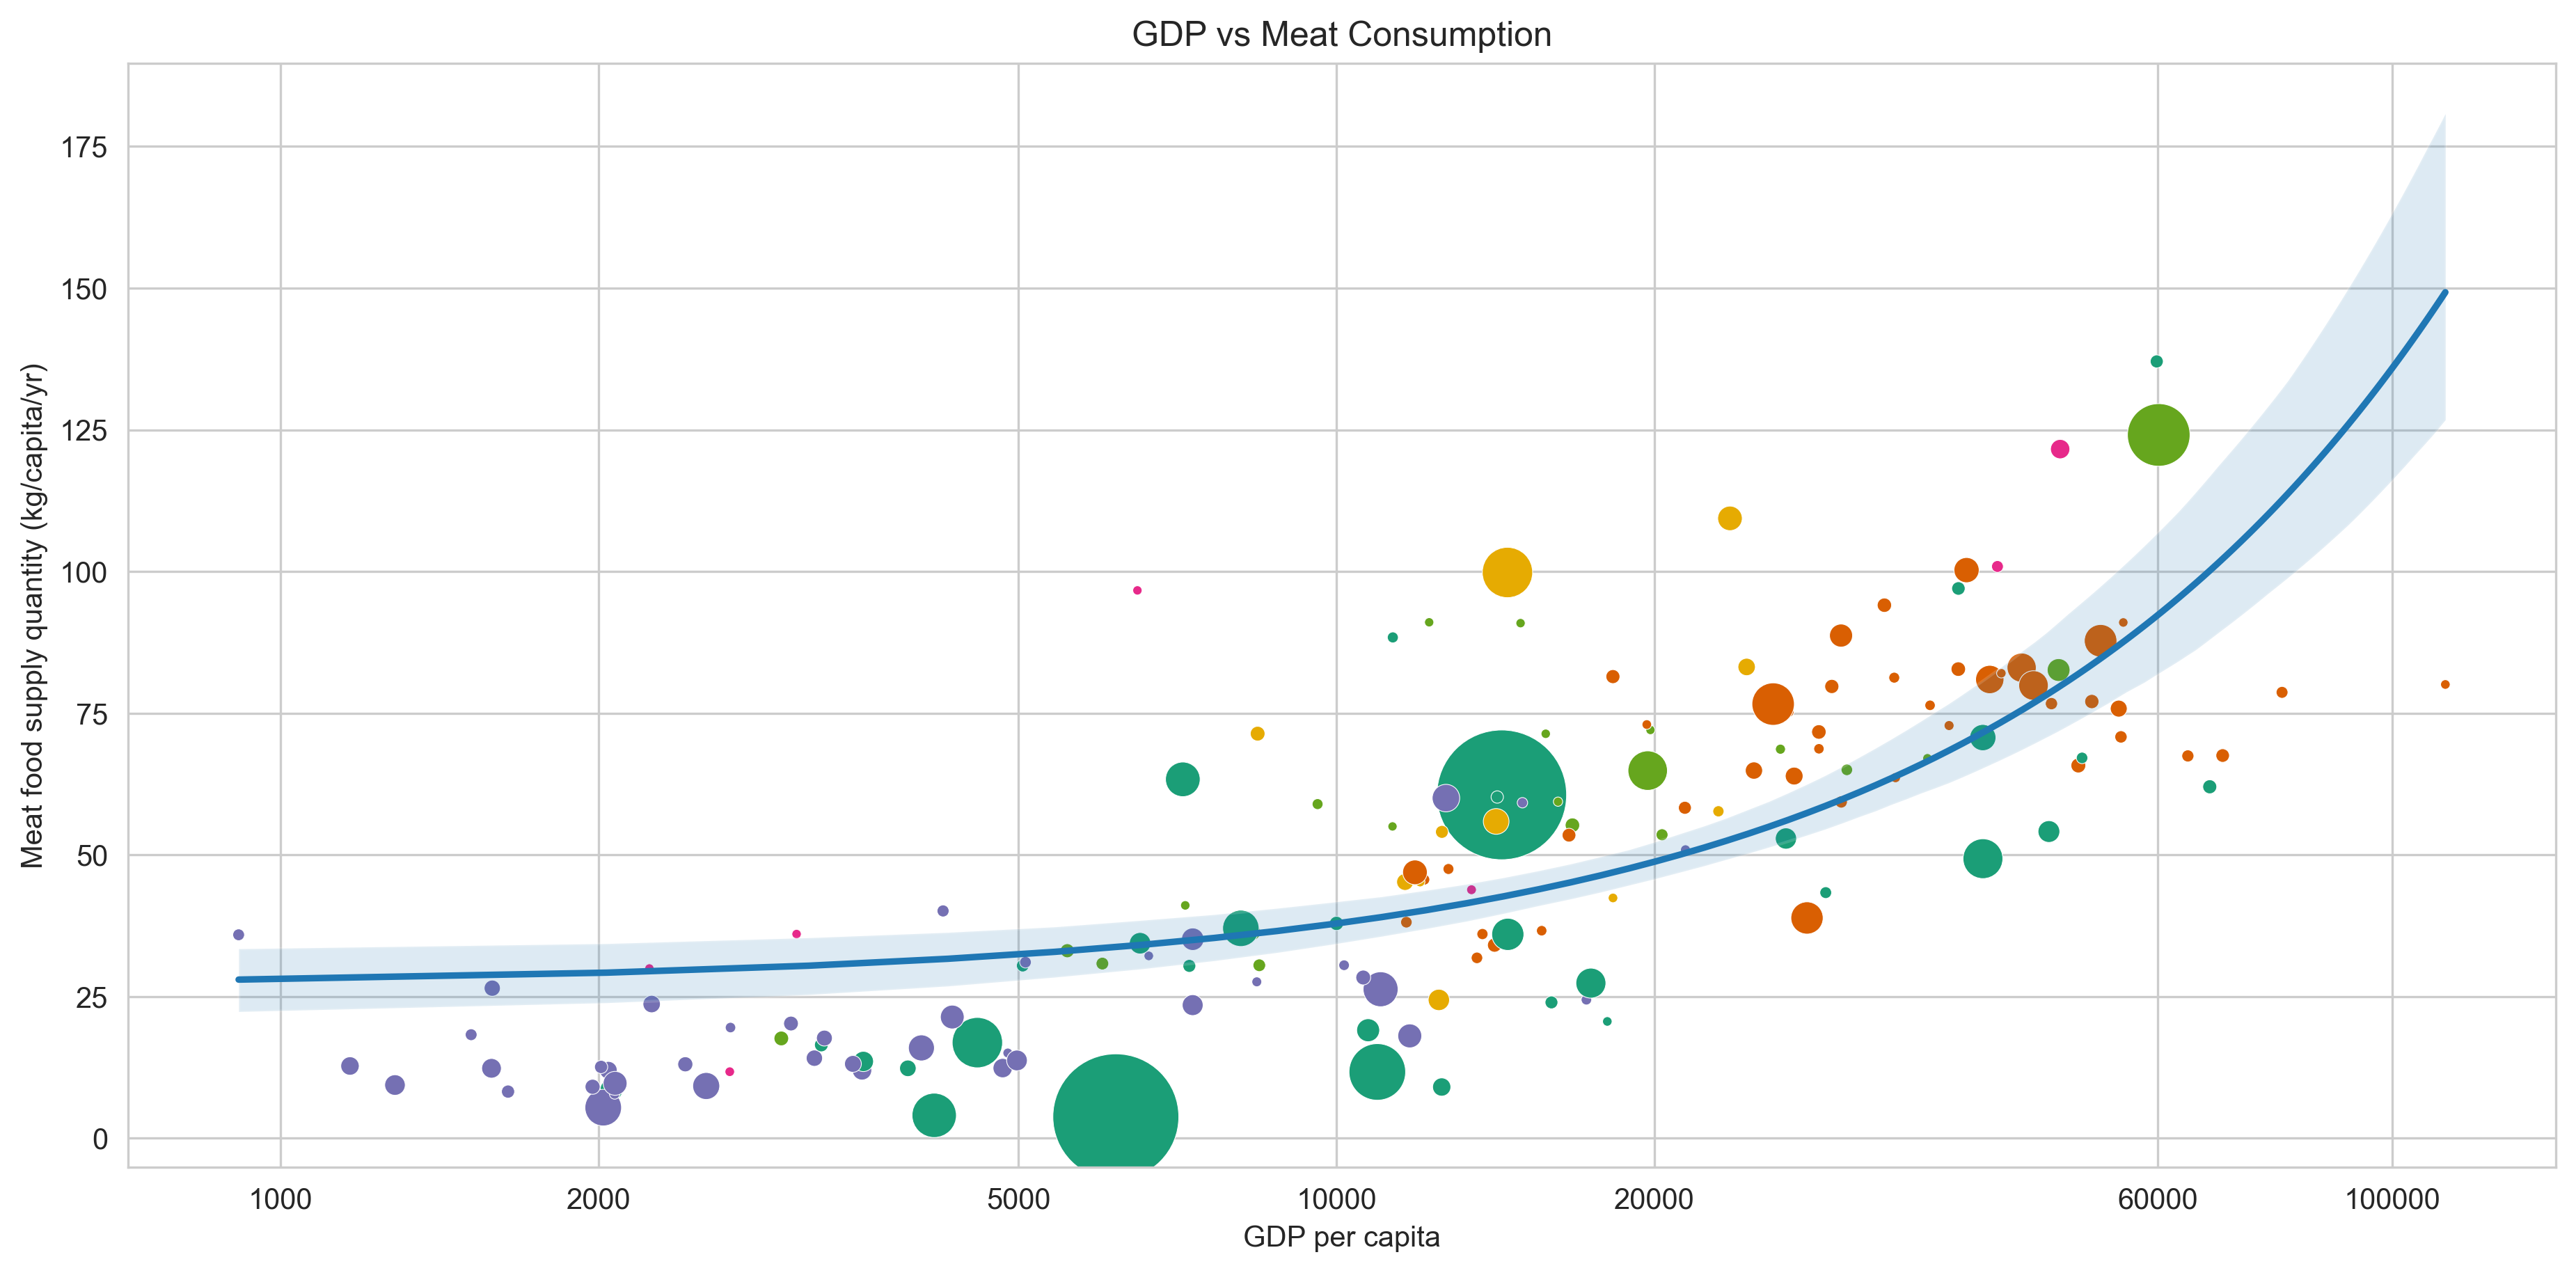

In [264]:
fig, ax = plt.subplots(figsize=(15,7))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
sns.scatterplot(data=df_merged_all,x='GDP per capita',y='Meat food supply quantity (kg/capita/yr)',
            hue='Continent', legend=False, size=df_merged_all['Population'], sizes = (10,2000),ax=ax,palette='Dark2')
sns.regplot(data=df_merged_all, x='GDP per capita',y='Meat food supply quantity (kg/capita/yr)', scatter=False, ax=ax)

sns.set_style('whitegrid')
ax.set_xscale('log')
ax.set_title('GDP vs Meat Consumption')
ax.set_xticks([1000,2000,5000,10000,20000,60000,100000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


That chart looks a lot better than the one before! 
- Color correlates to continent
- Size correlates to Population in 2017
- Regression line shows little change in Meat consumption until 10000 mark is hit, where then the data follows a more exponential growth pattern

In [265]:
'''# Making each country point a different color
cmap = matplotlib.cm.get_cmap('Spectral')
color_dict = pd.Series({k:cmap(np.random.rand()) for k in df_merged_all['Country'].unique()})
color_dict.name = 'color_dict'
# Merging the color to the dataframe
df_merged_all = pd.merge(df_merged_all, color_dict, how='left', left_on='Country', right_index=True)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
df_merged_all.plot.scatter(x='GDP per capita',
                           y='Meat food supply quantity (kg/capita/yr)',
                           s=df_merged_all['Population']/1000000,
                           figsize = (10,7),
                           c=df_merged_all['color_dict'],
                           title = 'GDP vs Meat consumption',
                           xlabel='GDP per Capita',
                           ylabel='Meat consumption(kg/capita/yr)',
                           logx=True)
ax.set_xticks([1000,2000,5000,10000,20000,60000,100000])
plt.show()'''

"# Making each country point a different color\ncmap = matplotlib.cm.get_cmap('Spectral')\ncolor_dict = pd.Series({k:cmap(np.random.rand()) for k in df_merged_all['Country'].unique()})\ncolor_dict.name = 'color_dict'\n# Merging the color to the dataframe\ndf_merged_all = pd.merge(df_merged_all, color_dict, how='left', left_on='Country', right_index=True)\n\nplt.rcParams['figure.dpi'] = 300\nplt.rcParams['savefig.dpi'] =300\ndf_merged_all.plot.scatter(x='GDP per capita',\n                           y='Meat food supply quantity (kg/capita/yr)',\n                           s=df_merged_all['Population']/1000000,\n                           figsize = (10,7),\n                           c=df_merged_all['color_dict'],\n                           title = 'GDP vs Meat consumption',\n                           xlabel='GDP per Capita',\n                           ylabel='Meat consumption(kg/capita/yr)',\n                           logx=True)\nax.set_xticks([1000,2000,5000,10000,20000,60000,100000